In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [23]:
import sys
sys.path.append('../drlfoil/')

In [24]:
import gymnasium as gym
import airfoil_env
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [28]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.5, efficiency_param = 1, cl_wide = 20, render_mode="human",
                    n_boxes=1,
                    set_reynolds = -1)
model = PPO.load("../models/300424/300424_2boxes_optuna2/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: Observation spaces do not match: Dict('airfoil': Box(-5.0, 5.0, (21,), float32), 'boxes': Box(-5.0, 5.0, (8,), float32), 'cl_target': Box(-5.0, 5.0, (1,), float32), 'reynolds': Box(0.0, 1.0, (1,), float32)) != Dict('airfoil': Box(-5.0, 5.0, (21,), float32), 'boxes': Box(-5.0, 5.0, (4,), float32), 'cl_target': Box(-5.0, 5.0, (1,), float32), 'reynolds': Box(0.0, 1.0, (1,), float32))

In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [26]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable log method

Step: 0, Action: [[ 1.          1.         -0.0434683   1.          1.          1.
   1.          1.          1.          1.         -1.          1.
  -1.          0.9807893  -1.         -1.          0.20554534 -1.
  -1.         -1.         -1.        ]], Reward: [-100.], Done: [False], Info: [{'step': 1, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


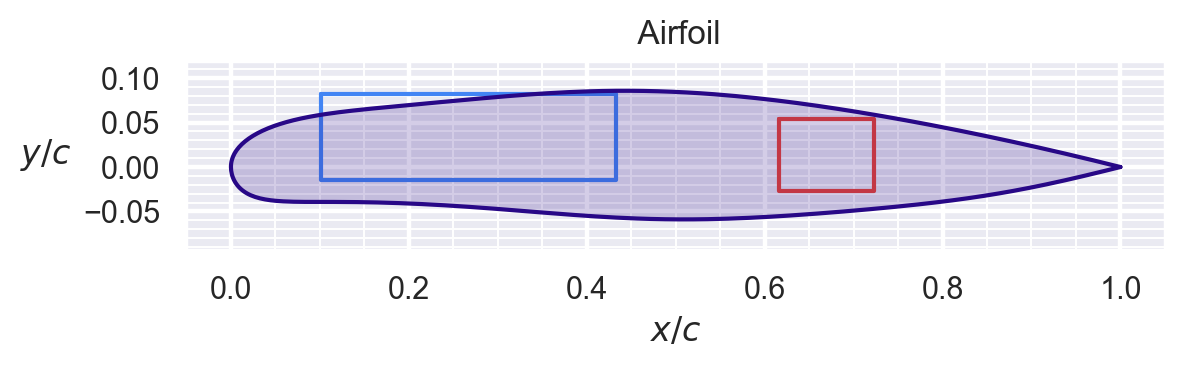

Step: 1, Action: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.         -1.          0.09961396
  -1.          1.         -1.         -0.58005655 -0.8047687  -1.
   0.24925664 -1.         -1.        ]], Reward: [47.534412], Done: [False], Info: [{'step': 2, 'efficiency': 48.292361592112364, 'cl': 0.4718757476259581, 'TimeLimit.truncated': False}]


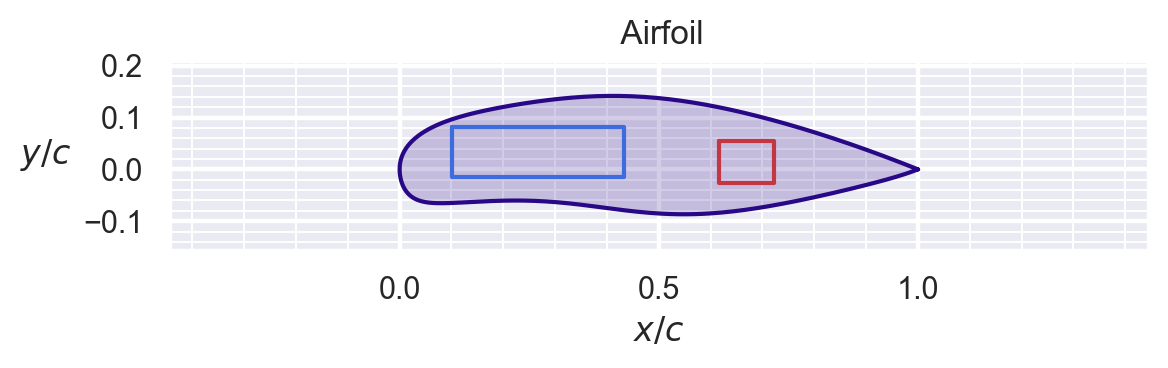

Step: 2, Action: [[ 1.          1.          1.          1.          1.         -0.23234682
  -0.9708562   1.          1.          1.          1.         -1.
  -0.5054375   1.         -1.          1.         -1.         -1.
   1.         -1.         -1.        ]], Reward: [44.046402], Done: [False], Info: [{'step': 3, 'efficiency': 49.14726296691522, 'cl': 0.5740194094731109, 'TimeLimit.truncated': False}]


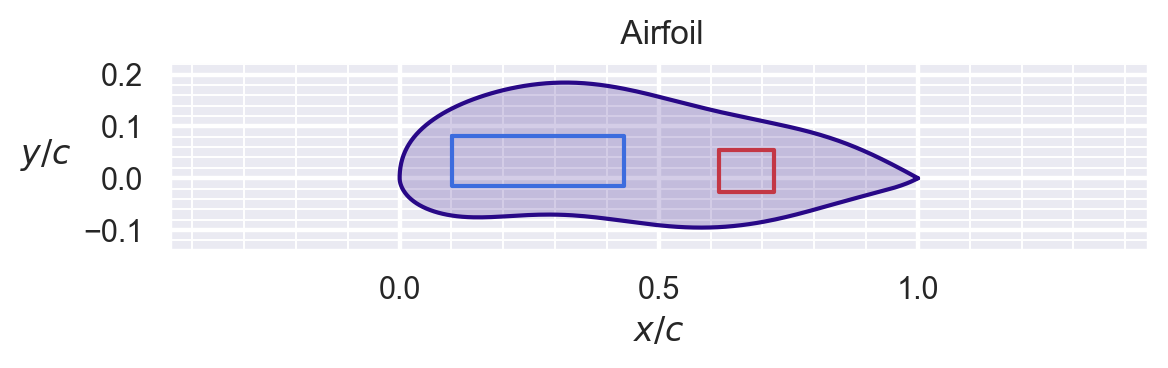

Step: 3, Action: [[ 1.          1.          1.         -0.48587862 -1.         -1.
  -0.66921693  0.04506485  1.          0.0294296   1.         -1.
  -0.4416143   1.         -1.          1.         -0.30729085 -1.
   1.         -0.81207156  0.894977  ]], Reward: [35.15193], Done: [False], Info: [{'step': 4, 'efficiency': 38.18863820296686, 'cl': 0.5643655322006182, 'TimeLimit.truncated': False}]


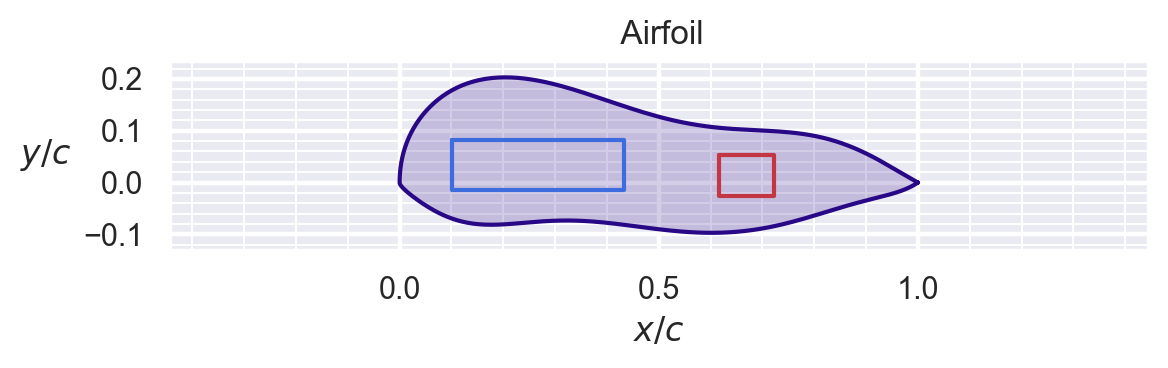

Step: 4, Action: [[ 0.5754573   0.05530298 -0.6370787  -0.78557664 -1.         -0.5907727
   0.5897763  -0.40746328  1.          0.5054683  -1.          0.62728137
  -0.9087795   1.         -1.          1.          1.         -1.
  -1.          0.43409184  1.        ]], Reward: [39.670895], Done: [False], Info: [{'step': 5, 'efficiency': 41.87075754991397, 'cl': 0.5519470280350278, 'TimeLimit.truncated': False}]


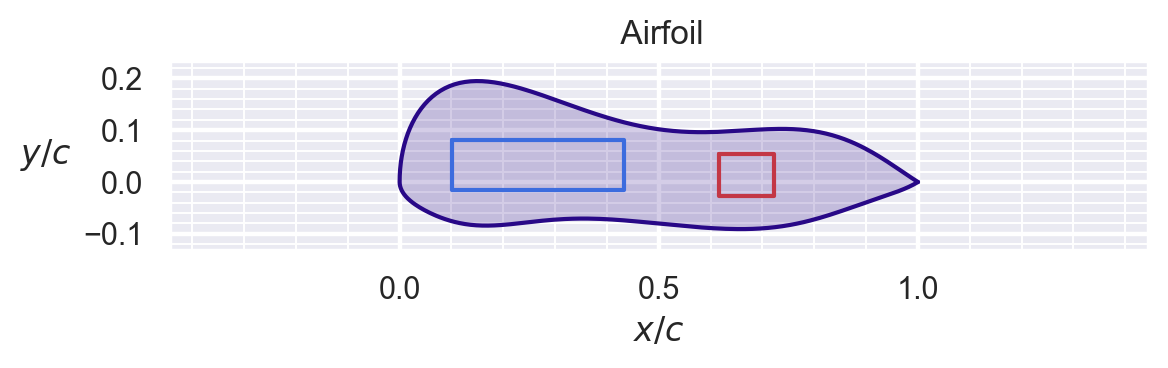

Step: 5, Action: [[-0.94578874 -0.48849002  0.06679531  0.83577514 -1.          0.3147953
   0.24571836 -0.36687425  1.          1.         -1.          0.73311305
  -0.99959236  1.         -1.          1.          1.         -1.
  -0.7796644   0.8802898   1.        ]], Reward: [43.262207], Done: [False], Info: [{'step': 6, 'efficiency': 45.302919088236735, 'cl': 0.5480062670034509, 'TimeLimit.truncated': False}]


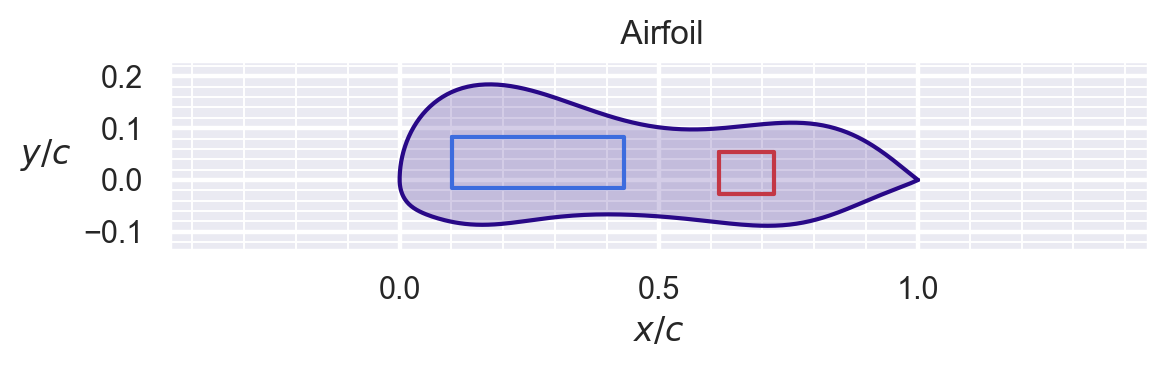

Step: 6, Action: [[-0.19921231 -0.15956458 -0.4178786   1.         -1.          0.82275754
  -0.20796567 -0.04531396  1.          1.         -1.          0.03699562
  -1.          1.         -1.          1.          1.         -1.
  -0.5904576   0.25971594  1.        ]], Reward: [44.630077], Done: [False], Info: [{'step': 7, 'efficiency': 46.21168352234035, 'cl': 0.5417280707433478, 'TimeLimit.truncated': False}]


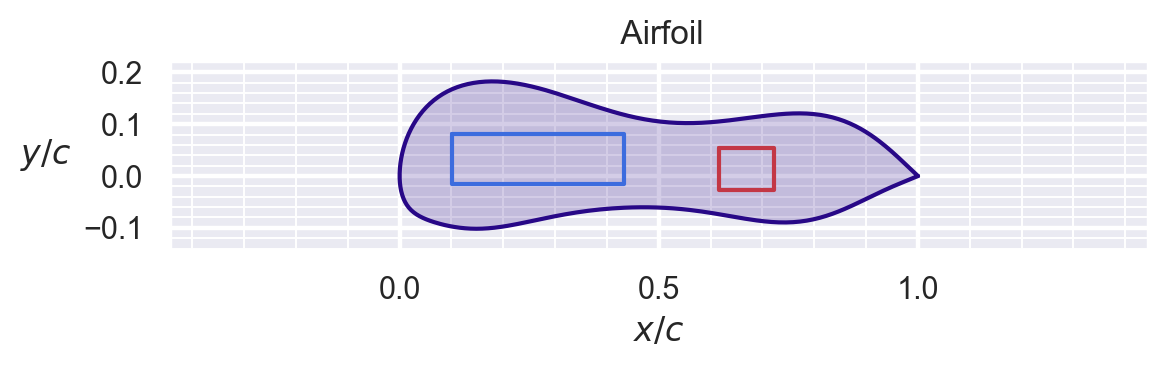

Step: 7, Action: [[-0.24946001  0.07255886 -0.44230622  1.         -1.          0.96694237
  -0.551634    0.09510823  1.          1.         -1.         -0.06894173
  -0.75047845  1.         -1.          1.          0.581635   -1.
  -0.33401543  0.1410571   1.        ]], Reward: [42.87065], Done: [False], Info: [{'step': 8, 'efficiency': 46.97371323006284, 'cl': 0.5676020372523048, 'TimeLimit.truncated': False}]


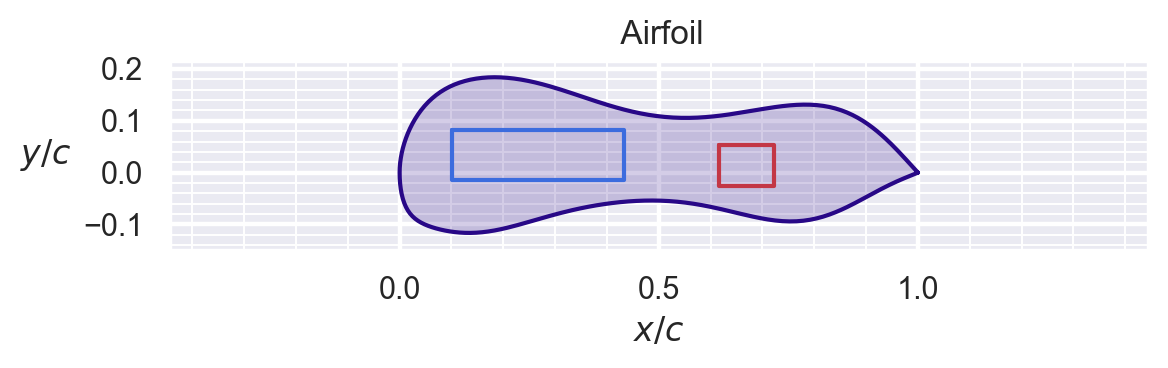

Step: 8, Action: [[-0.38235983  0.07092969 -0.535796    1.         -1.          1.
  -0.73401386  0.1403128   1.          1.         -1.         -0.02494429
  -0.6408562   0.6778999  -1.          0.6595609   0.19927016 -1.
  -0.28519043  0.1156465   1.        ]], Reward: [40.256363], Done: [False], Info: [{'step': 9, 'efficiency': 44.80806305462688, 'cl': 0.5731847081544237, 'TimeLimit.truncated': False}]


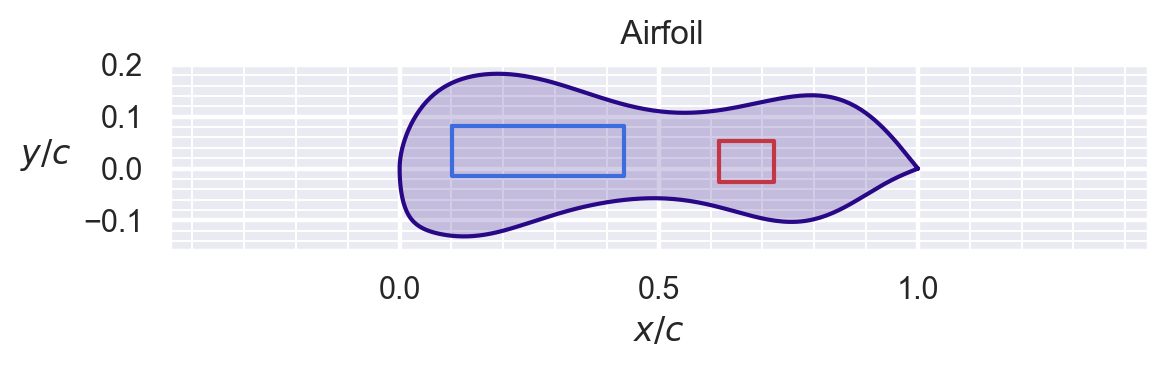

Step: 9, Action: [[-0.40720275  0.14157805 -0.5449664   1.         -1.          1.
  -0.8307702   0.23501019  1.          1.         -0.98496246 -0.08585815
  -0.6927311   0.5075687  -1.          0.4463601  -0.13458714 -1.
  -0.21904424 -0.02874762  1.        ]], Reward: [38.184048], Done: [ True], Info: [{'step': 10, 'efficiency': 40.73066486312586, 'cl': 0.5568170109529567, 'episode': {'r': 275.606988, 'l': 10, 't': 11.422127}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.45871505,  0.6538473 ,  0.16679516,  1.084648  , -0.5       ,
        0.7422064 , -0.06934434,  0.5043767 ,  1.6       ,  1.3802347 ,
       -0.9977444 , -0.05241102, -1.2909235 ,  1.2749387 , -1.6       ,
        0.7288797 ,  0.16097058, -1.6       , -0.3938673 , -0.4015027 ,
        0.5842466 ], dtype=float32), 'cl_target': array([0.5], dtype=float32), 'boxes': array([0.26683235, 0.03357374, 0.3313236 , 0.09677456, 0.6692651 ,
       0.01370628, 0.10721315, 0.08030141], dtype=float32

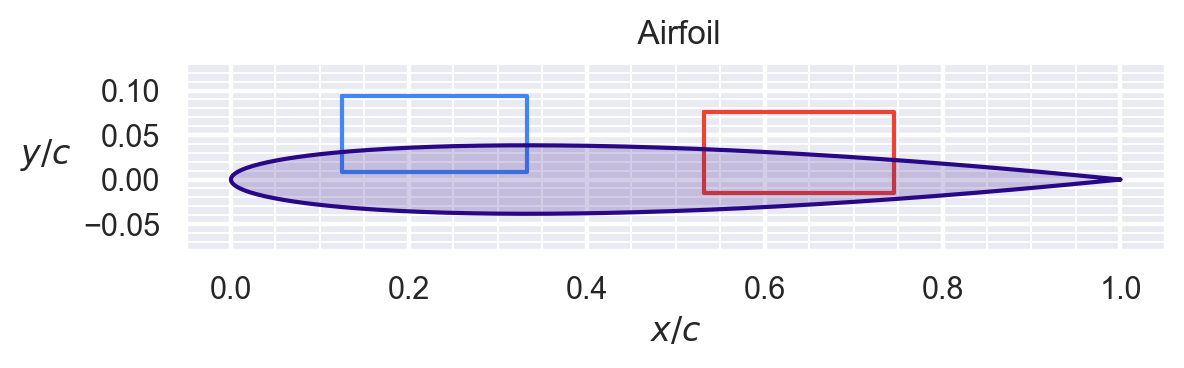

Step: 10, Action: [[ 1.          1.         -0.07218947  1.          1.          1.
   1.          1.          1.          1.         -1.          1.
  -1.          1.         -1.         -1.          0.18271318 -1.
  -1.         -1.         -1.        ]], Reward: [-100.], Done: [False], Info: [{'step': 1, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


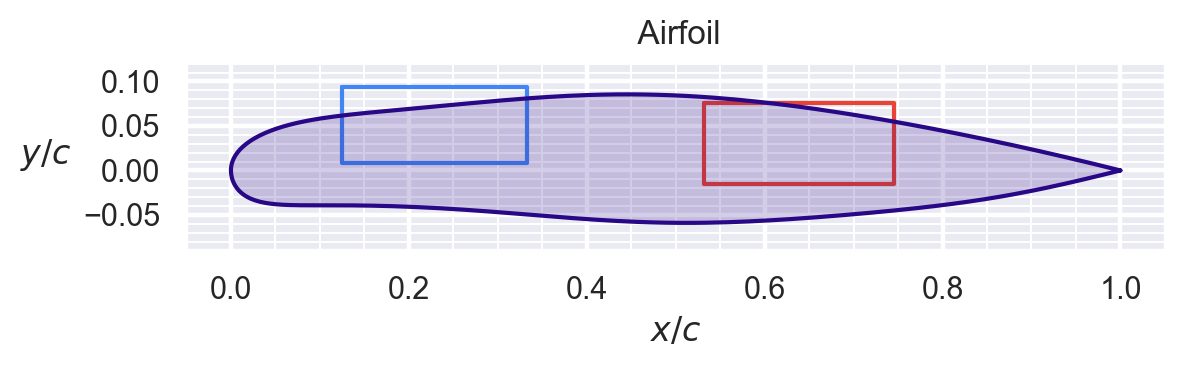

Step: 11, Action: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.         -1.          0.20669669
  -1.          1.         -1.         -0.54224074 -0.8296706  -1.
   0.43150473 -1.         -1.        ]], Reward: [48.062843], Done: [False], Info: [{'step': 2, 'efficiency': 48.64684070910686, 'cl': 0.47542618510427437, 'TimeLimit.truncated': False}]


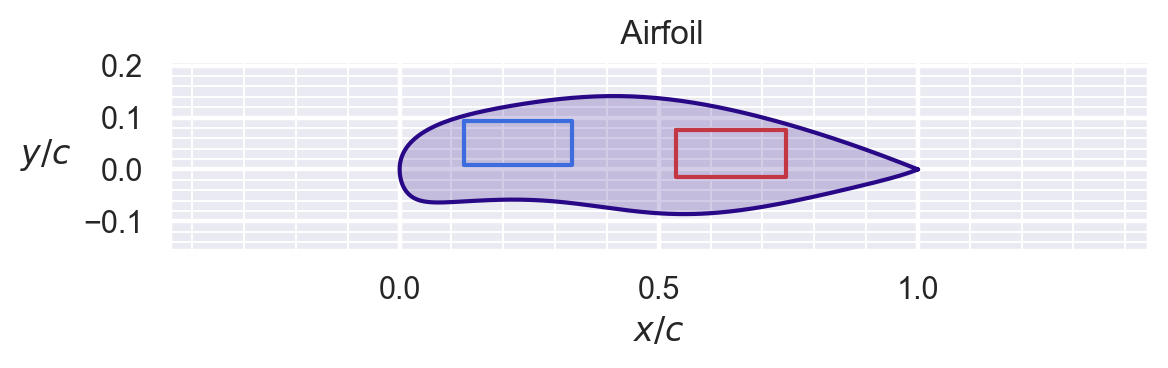

Step: 12, Action: [[ 1.          1.          1.          1.          1.         -0.36159086
  -0.94751745  1.          1.          1.          1.         -1.
  -0.35716894  1.         -1.          1.         -1.         -1.
   1.         -1.         -1.        ]], Reward: [42.087322], Done: [False], Info: [{'step': 3, 'efficiency': 50.936216575589896, 'cl': 0.5976799856994811, 'TimeLimit.truncated': False}]


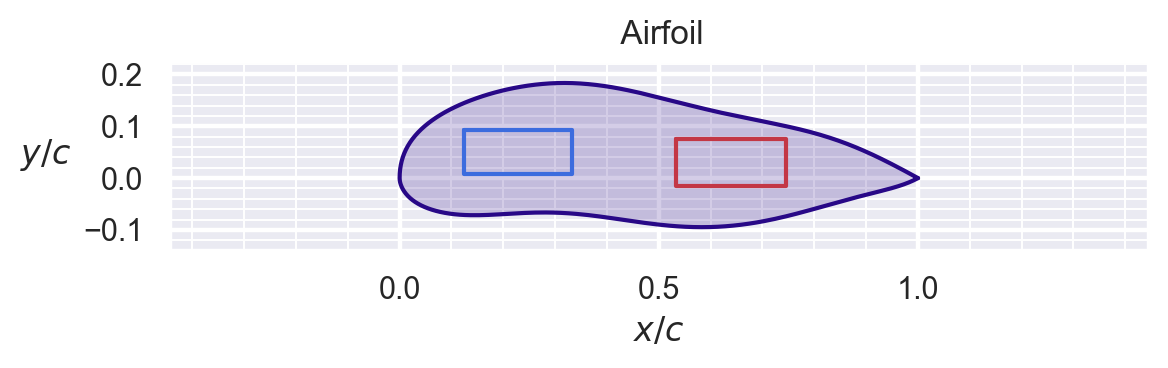

Step: 13, Action: [[ 1.          1.          1.         -0.50616956 -1.         -1.
  -0.57423574  0.01041843  1.         -0.08251177  1.         -1.
  -0.48662207  1.         -1.          1.         -0.29414105 -1.
   1.         -0.7886134   0.83883923]], Reward: [34.972942], Done: [False], Info: [{'step': 4, 'efficiency': 39.49262488969644, 'cl': 0.5779548695832558, 'TimeLimit.truncated': False}]


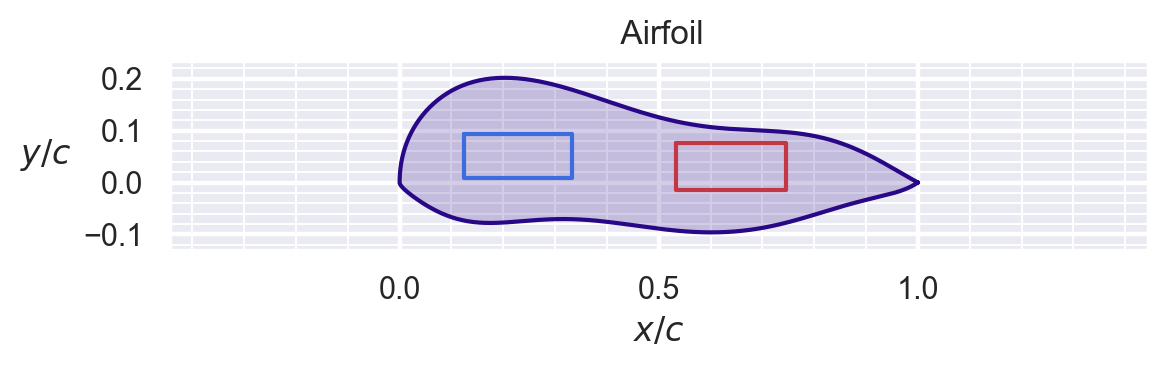

Step: 14, Action: [[ 0.47479606 -0.06299785 -0.63862365 -0.7608558  -1.         -0.60529727
   0.635712   -0.4011842   1.          0.4005172  -1.          0.63866776
  -0.86957115  1.         -1.          1.          1.         -1.
  -1.          0.4408774   1.        ]], Reward: [40.432743], Done: [False], Info: [{'step': 5, 'efficiency': 43.04363158089201, 'cl': 0.5559349302596351, 'TimeLimit.truncated': False}]


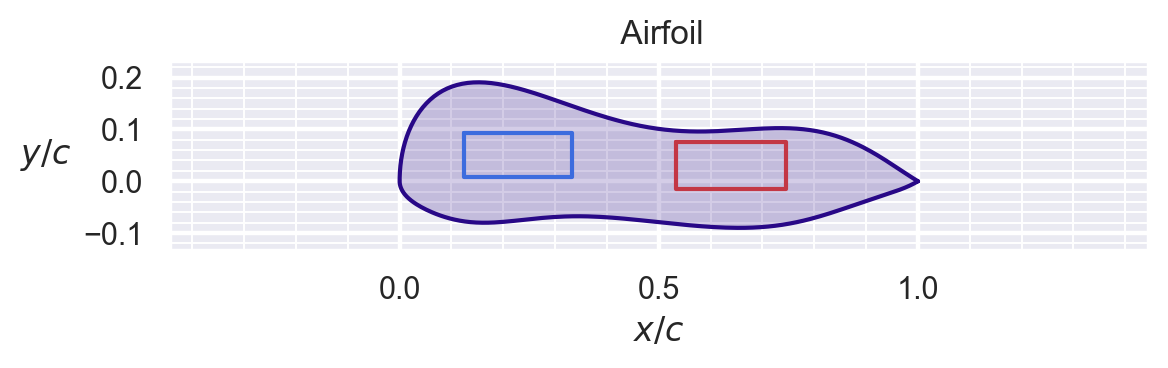

Step: 15, Action: [[-0.94185495 -0.47431466  0.04665837  0.85337484 -1.          0.31844178
   0.2737022  -0.3464162   1.          1.         -1.          0.7085996
  -0.9863532   1.         -1.          1.          1.         -1.
  -0.729434    0.87475806  1.        ]], Reward: [43.54983], Done: [False], Info: [{'step': 6, 'efficiency': 46.44828813051787, 'cl': 0.5567599405724631, 'TimeLimit.truncated': False}]


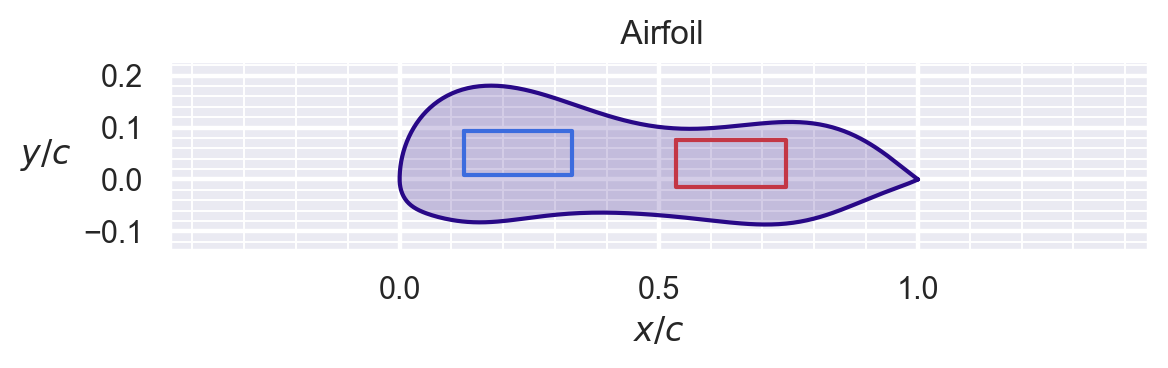

Step: 16, Action: [[-0.18555602 -0.12063247 -0.4348597   1.         -1.          0.80886257
  -0.20117974 -0.04258262  1.          1.         -1.          0.01400059
  -1.          1.         -1.          1.          1.         -1.
  -0.53423864  0.2710401   1.        ]], Reward: [44.568638], Done: [False], Info: [{'step': 7, 'efficiency': 47.25433484591238, 'cl': 0.554089726135539, 'TimeLimit.truncated': False}]


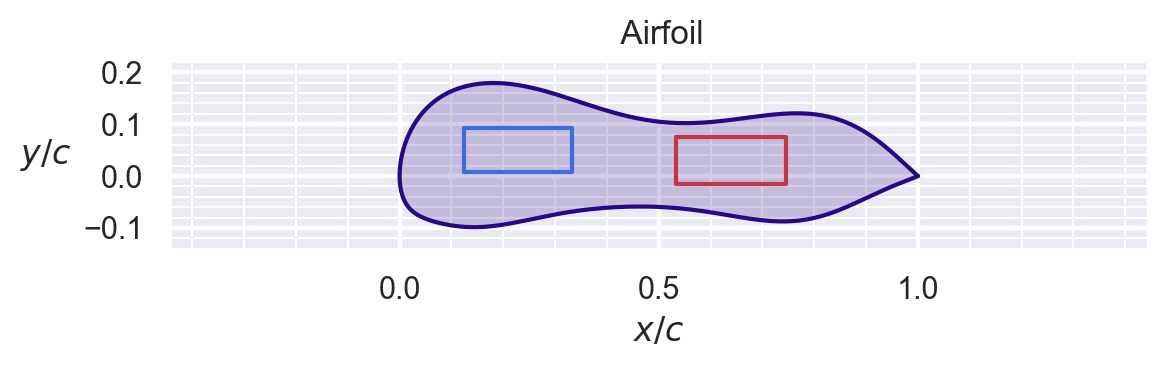

Step: 17, Action: [[-0.2631975   0.0967921  -0.4518181   1.         -1.          0.9499503
  -0.5446515   0.08379886  1.          1.         -1.         -0.06361304
  -0.70405734  1.         -1.          1.          0.55280215 -1.
  -0.28695866  0.17798446  1.        ]], Reward: [41.814957], Done: [False], Info: [{'step': 8, 'efficiency': 48.24400702990411, 'cl': 0.584562840257383, 'TimeLimit.truncated': False}]


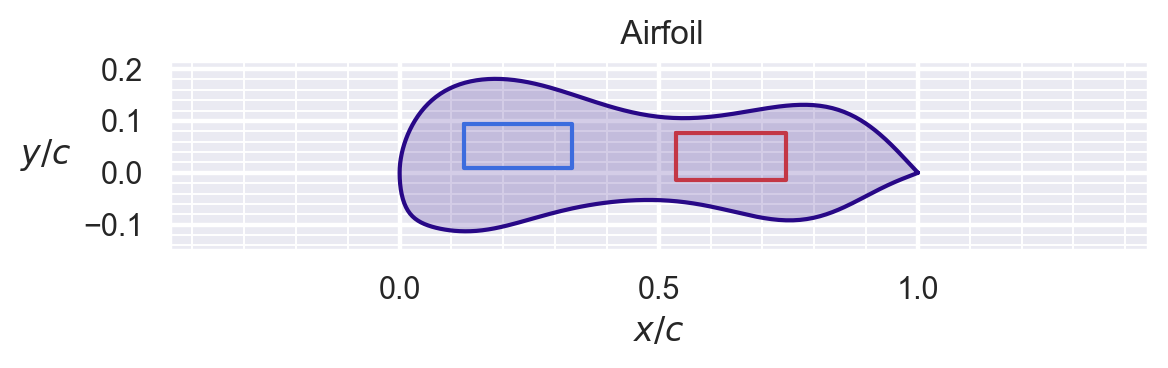

Step: 18, Action: [[-0.39974973  0.08225718 -0.5499226   1.         -1.          1.
  -0.72390336  0.12427703  1.          1.         -1.         -0.02409983
  -0.63908654  0.660453   -1.          0.77413285  0.18388665 -1.
  -0.25356326  0.14962734  1.        ]], Reward: [39.28561], Done: [False], Info: [{'step': 9, 'efficiency': 46.00110860636061, 'cl': 0.5888276889989297, 'TimeLimit.truncated': False}]


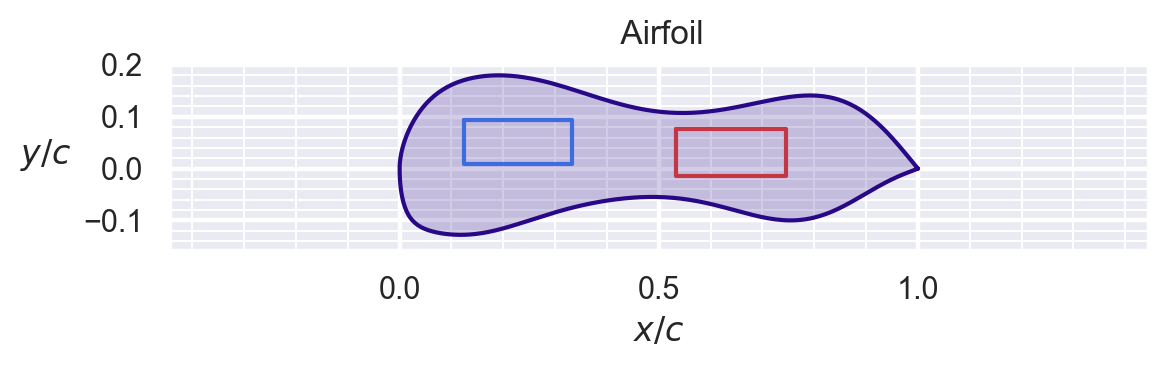

Step: 19, Action: [[-0.42310408  0.14922959 -0.5649582   1.         -1.          1.
  -0.8226511   0.21730644  1.          1.         -0.9362469  -0.0876639
  -0.70649236  0.48260123 -1.          0.52455354 -0.15875173 -1.
  -0.21468991  0.00495778  1.        ]], Reward: [37.833668], Done: [ True], Info: [{'step': 10, 'efficiency': 42.09681710291719, 'cl': 0.5730659816100985, 'episode': {'r': 272.608561, 'l': 10, 't': 13.452289}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.43920007,  0.6505501 ,  0.150143  ,  1.0879525 , -0.5       ,
        0.716555  , -0.0357087 ,  0.49684268,  1.6       ,  1.3477008 ,
       -0.9904371 , -0.04111182, -1.2624028 ,  1.2714581 , -1.6       ,
        0.7634669 ,  0.1455258 , -1.6       , -0.33810696, -0.38040525,
        0.5758259 ], dtype=float32), 'cl_target': array([0.5], dtype=float32), 'boxes': array([0.2287314 , 0.05112564, 0.20753197, 0.08469045, 0.6390855 ,
       0.03072757, 0.21344684, 0.09084317], dtype=float32

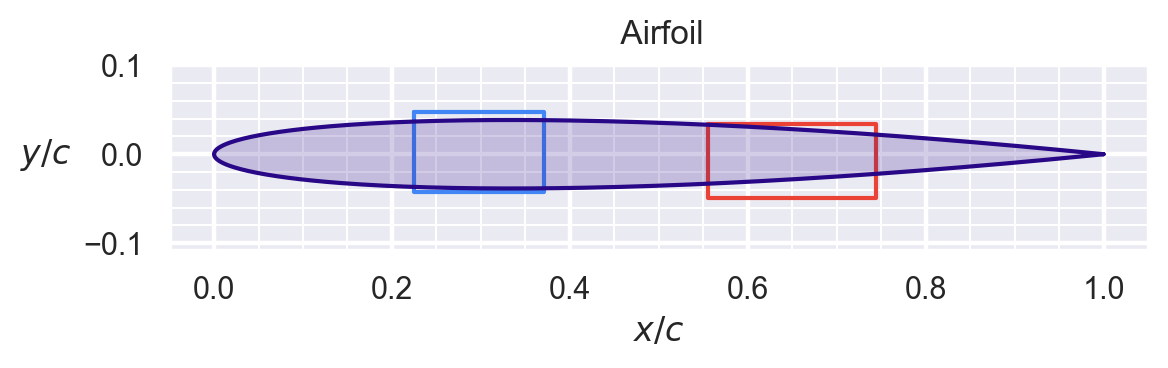

In [11]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()